In [3]:
%matplotlib inline

In [4]:
""" 
    Script Created By Roz Roberts on 02/17/25
"""

' \n    Script Created By Roz Roberts on 02/17/25\n'

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from metpy.plots import SkewT, Hodograph
from metpy.units import units as u
import metpy.calc as mc

In [6]:
current_directory = "."

sounding_files = [os.path.join(root, file) for root, dirs, files in os.walk(current_directory) for file in files if file.endswith(".csv")]

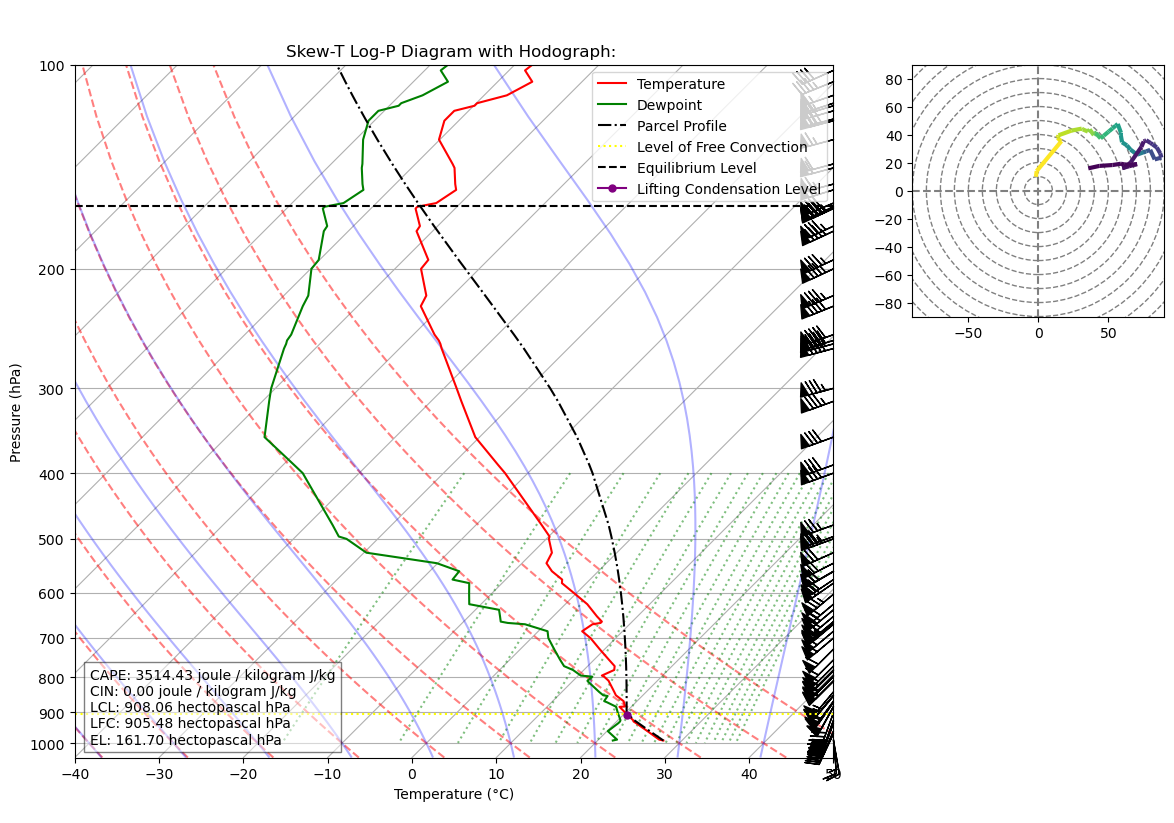

C:\Users\roswe\AppData\Local\Temp\ipykernel_22496\3791913547.py:31: UserWarning: Duplicate pressure(s) [14.8] hPa provided. Output profile includes duplicate temperatures as a result.
  parcel_prof = mc.parcel_profile(press, temp[0], dewT[0]).to('degC')
C:\Users\roswe\AppData\Local\Temp\ipykernel_22496\3791913547.py:32: UserWarning: Duplicate pressure(s) [14.8] hPa provided. Output profile includes duplicate temperatures as a result.
  lfc_press, lfc_temp = mc.lfc(press, temp, dewT)
C:\Users\roswe\AppData\Local\Temp\ipykernel_22496\3791913547.py:33: UserWarning: Duplicate pressure(s) [14.8] hPa provided. Output profile includes duplicate temperatures as a result.
  el_press, el_temp = mc.el(press, temp, dewT)


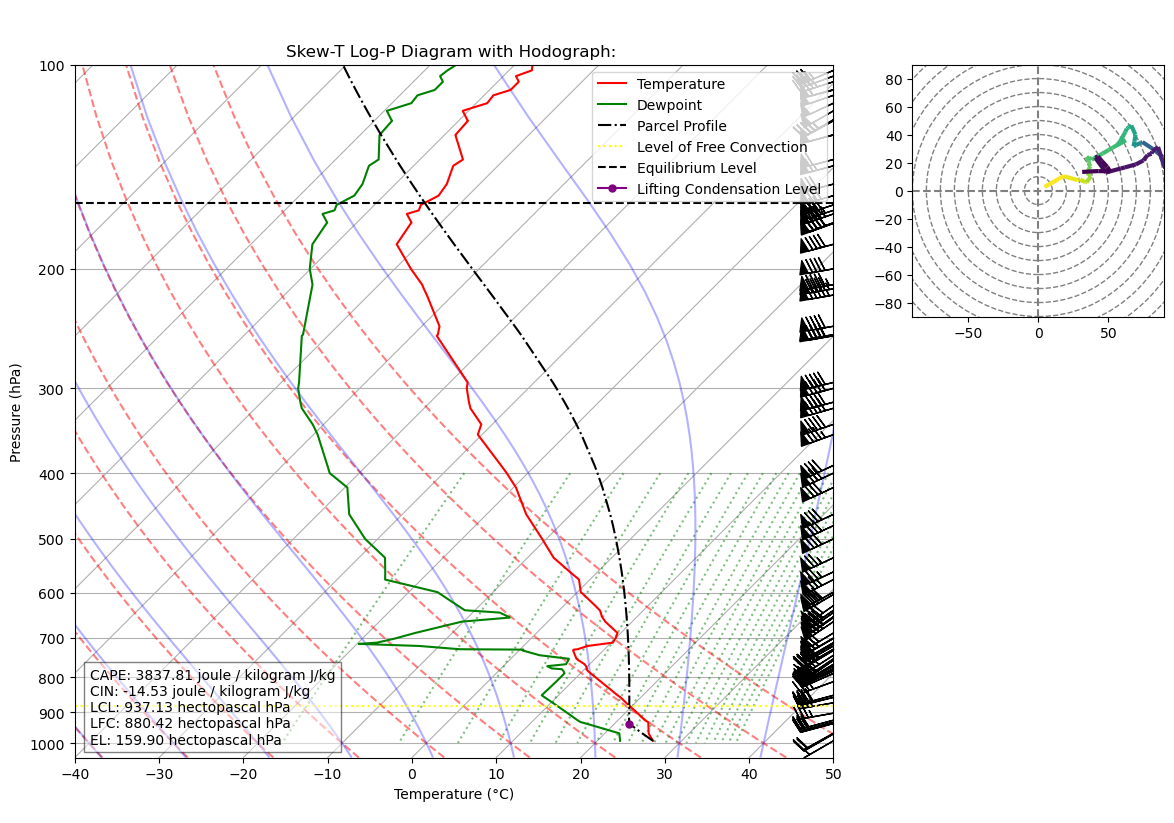

C:\Users\roswe\AppData\Local\Temp\ipykernel_22496\3791913547.py:31: UserWarning: Duplicate pressure(s) [68.9] hPa provided. Output profile includes duplicate temperatures as a result.
  parcel_prof = mc.parcel_profile(press, temp[0], dewT[0]).to('degC')
C:\Users\roswe\AppData\Local\Temp\ipykernel_22496\3791913547.py:32: UserWarning: Duplicate pressure(s) [68.9] hPa provided. Output profile includes duplicate temperatures as a result.
  lfc_press, lfc_temp = mc.lfc(press, temp, dewT)
C:\Users\roswe\AppData\Local\Temp\ipykernel_22496\3791913547.py:33: UserWarning: Duplicate pressure(s) [68.9] hPa provided. Output profile includes duplicate temperatures as a result.
  el_press, el_temp = mc.el(press, temp, dewT)


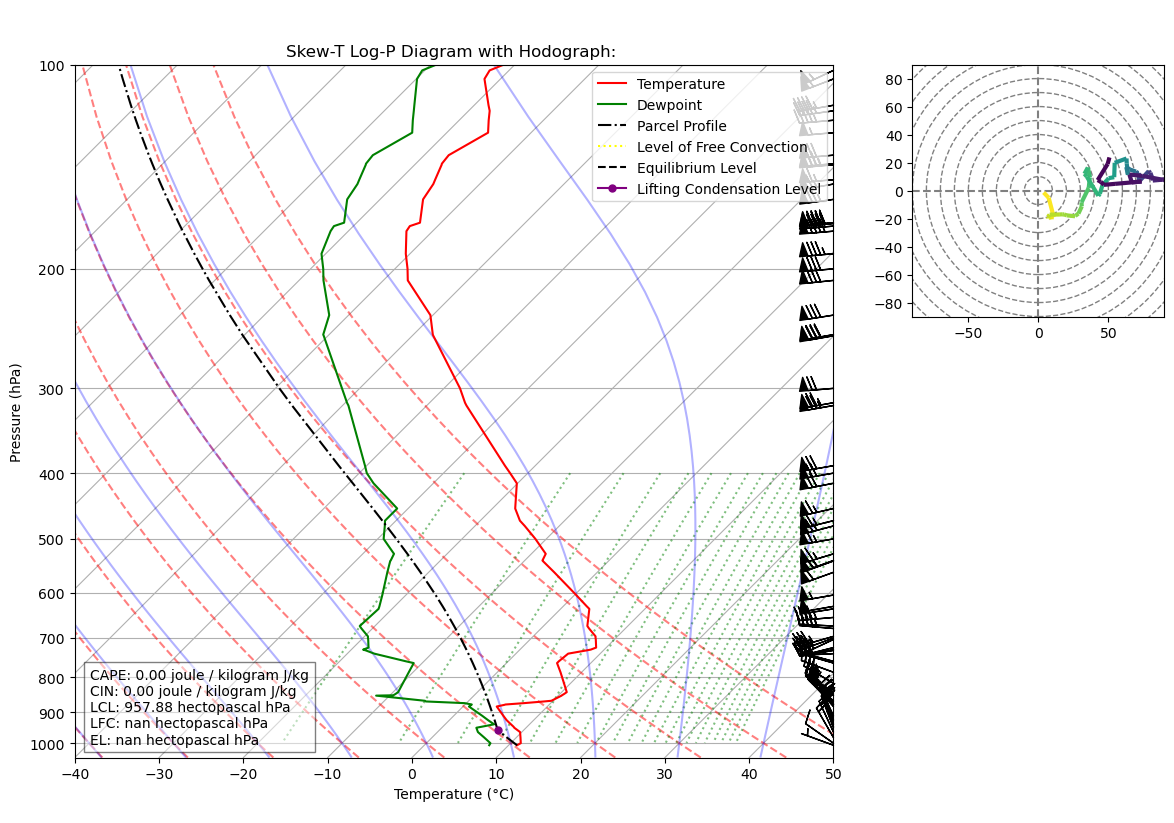

In [7]:
for sound in sounding_files:

    df = pd.read_csv(sound)
    
    # print(df)
    
    df.replace(-9999, np.nan, inplace=True)  # replaces empty values (-9999) with numpy nan values which can then be removed eaiser
    
    df.dropna(inplace=True)
    
    press = df["pres[hPa]"].values * u.hPa  # Converts each datafram column into a numpy list for plotting, and sets the correct units for the value
    height = df["height[m]"].values * u.meters
    temp = df["temp[degC]"].values * u.degC
    dewT = df["dewpoint[degC]"].values * u.degC
    relh = df["rh[%]"].values
    mixr = df["mr[g/kg]"].values * u.grams / u.kilograms
    wddir = df["direction[deg]"].values * u.degrees
    wdspkt = df["speed[kt]"].values * u.knots
    theta = df["theta[K]"].values * u.kelvin
    thetaE = df["thetaE[K]"].values * u.kelvin
    thetaV = df["thetaV[K]"].values * u.kelvin
    
    u_wind, v_wind = mc.wind_components(wdspkt, wddir)  # Takes the wind speed in knots and wind direction in degrees and gets the UV components
    
    wind_barb_cuttoff = sum(press > 100 * u.hPa)
    
    u_wind = u_wind[:wind_barb_cuttoff]
    v_wind = v_wind[:wind_barb_cuttoff]
    
    
    parcel_prof = mc.parcel_profile(press, temp[0], dewT[0]).to('degC')
    lfc_press, lfc_temp = mc.lfc(press, temp, dewT)
    el_press, el_temp = mc.el(press, temp, dewT)
    lcl_press, lcl_temp = mc.lcl(press[0], temp[0], dewT[0])
    cape, cin = mc.cape_cin(press, temp, dewT, parcel_prof)
    
    
    fig = plt.figure(figsize=(19,9))
    
    skew = SkewT(fig, rotation=45)
    
    skew.plot(press, temp, c='red', label='Temperature')  # Profile Lines
    skew.plot(press, dewT, c='green', label='Dewpoint')
    skew.plot(press, parcel_prof, c='black', linestyle='-.', label='Parcel Profile')
    
    
    skew.plot_barbs(press[:wind_barb_cuttoff], u_wind, v_wind)  # Wind Barbs

    
    t_sep = np.arange(-40, 60, 10)*u.degC  # Seperation Values
    m_sep = np.arange(1, 42, 2) * u.grams / u.kilograms
    p_sep = np.arange(400, 1000, 1) * u.hPa
    
    skew.plot_dry_adiabats(t0=t_sep, alpha=0.5, linestyle="--",color='orange')  # Normal SkewT lines
    skew.plot_mixing_lines(mixing_ratio=m_sep, pressure = p_sep, alpha=0.5, linestyle=':', color='teal')
    skew.plot_moist_adiabats(t0=t_sep, alpha=0.3, linestyle="-",color='g')
    
    
    skew.ax.axhline(lfc_press, color='yellow', linestyle=':', label="Level of Free Convection")
    skew.ax.axhline(el_press,color='black', linestyle='--', label='Equilibrium Level')
    skew.plot(lcl_press, lcl_temp, label = "Lifting Condensation Level", marker='o',color='purple', markersize=5)
    
    
    text = (f'CAPE: {cape:.2f} J/kg\n'
                 f'CIN: {cin:.2f} J/kg\n'
                 f'LCL: {lcl_press:.2f} hPa\n'
                 f'LFC: {lfc_press:.2f} hPa\n'
                 f'EL: {el_press:.2f} hPa')
    skew.ax.text(0.02, 0.02, text, transform=skew.ax.transAxes, fontsize=10, 
                 bbox=dict(facecolor='white', alpha=0.5, edgecolor='black'))
    
    
    
    
    plt.legend(loc='upper right')
    plt.title(f'Skew-T Log-P Diagram with Hodograph: {sound[21:-4]}')
    skew.ax.set_xlabel('Temperature (°C)')
    skew.ax.set_ylabel('Pressure (hPa)')
    skew.ax.grid(True)





    ax_hodo = fig.add_axes([0.68, 0.6, 0.28, 0.28])
    h = Hodograph(ax_hodo, component_range=90)
    h.add_grid()
    h.plot_colormapped(u_wind, v_wind, press[:wind_barb_cuttoff], label='Hodograph')
    
    plt.savefig(f"{sound[:-4]}_results.pdf")
    plt.show()